# Supervised Learning using the dataset fabert of Open ML

# 1. Examining the dataset 

<p> This dataset is used in competitions for machine learning tasks with various limits (i.e. time limits). This dataset is for multi-class classification. As we will see later, the data features have no specific name, and have been already processed. The entire point is to reach highest accuracy.</p>

In [1]:
# Εισάγουμε τις βασικές βιβλιοθήκες για να φορτώσουμε το dataset
# και να αναπαραστήσουμε τα δεδομένα μας.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

filename = "fabert.csv"  # Εδώ μπορούμε να βάλουμε και το path του αρχείου 
df = pd.read_csv(filename)

Let us examine the first 20 values of our dataset...

In [2]:
df.head(20)

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V791,V792,V793,V794,V795,V796,V797,V798,V799,V800
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, this dataset contains 800 features, and the class of each datum is placed in the first column. Furthermore, none of the features are named since the dataset comes from a competition, where feature names are of no importance. The only target is high **test** accuracy. 

Impressively most features are zero!!!

In [3]:
# Τα στοιχεία του dataset
print('Number of data: ', df.shape[0])
print('Number of features: ', df.shape[1] - 1)
N_data = df.shape[0] 
N_features = df.shape[1] - 1

Number of data:  8237
Number of features:  800


In [4]:
#no null values!
not df.isnull().values.any()

True

All in all, our dataset contains 8237 rows and 800 columns (801 with class).

In [5]:
#Most values are zeros!!!
zeros = (df.loc[:, df.columns != 'class'] == 0.0).sum()
#zero percentage for each column
zeros_percentage = pd.DataFrame(zeros/8237).T
zeros_percentage

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V791,V792,V793,V794,V795,V796,V797,V798,V799,V800
0,0.99223,0.996601,0.980211,0.993566,0.978026,0.991745,0.979361,0.964065,0.947068,0.980333,...,0.963093,0.989681,0.969771,0.996601,0.973534,0.993444,0.994051,0.998665,0.972077,0.994294


Therefore, each feature has 95% probability of being zero.

In [6]:
#All classes, with their frequencies...
unique_classes = df.groupby(['class']).count()['V1']
unique_classes

class
0     933
1    1433
2    1927
3    1515
4     979
5     948
6     502
Name: V1, dtype: int64

Our classes are 7.
Those are 0, 1, 2, 3, 4, 5, 6

In [7]:
unique_class_percentage = unique_classes/N_data

In [8]:
unique_class_percentage

class
0    0.113269
1    0.173971
2    0.233944
3    0.183926
4    0.118854
5    0.115090
6    0.060945
Name: V1, dtype: float64

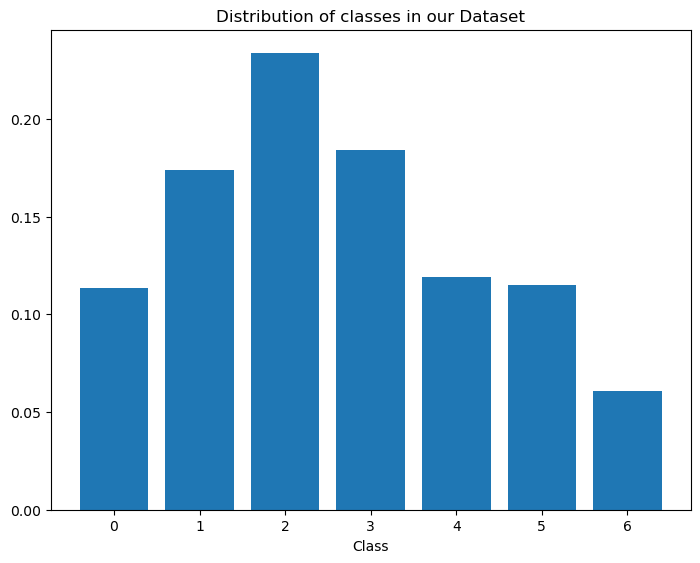

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(7),unique_class_percentage)
plt.title('Distribution of classes in our Dataset')
plt.xlabel('Class')
fig

Our dataset is unbalanced. The class with most members, which is 2, is triple in size from class 6 and double from classes 0, 4, 5 . 

# 2.0 Preparing the data...

First, let us split the data in train and test

In [10]:
X_data = df.iloc[:, 1:].to_numpy(dtype='float64')
y_data = df.iloc[:, 0].to_numpy(dtype='int64')

print(y_data.shape, "Total samples")
print(X_data.shape, "(n_samples x n_features)")

(8237,) Total samples
(8237, 800) (n_samples x n_features)


Let us use stratified split, so us to keep the unequal distribution.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

strat = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state=42)
train_idx, test_idx = next(strat.split(X_data, y_data))

X_train, y_train = X_data[train_idx], y_data[train_idx]
X_test, y_test = X_data[test_idx], y_data[test_idx]

Now we will use various classifiers!

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [13]:
collection = [('GaussianNB', GaussianNB()), ('KNN', KNeighborsClassifier()), 
              ('Dummy', DummyClassifier()) ,('SVM', SVC()), ('Lr', LogisticRegression()), ('MLP', MLPClassifier())]

In [14]:
import warnings
warnings.filterwarnings("ignore")

names = []
f1s = []
accs = []
times = []
#Calculate scores for each model.
for name, model in collection:
    names.append(name)
    print(f'Training {name} model ...')
    start = time.time()
    model.fit(X_train, y_train)
    times.append(time.time()-start)
    print('Finished training!')
    #accuracy and f1 calculation
    accs.append(round(model.score(X_test, y_test),4)*100)
    f1s.append(round(f1_score(y_test, model.predict(X_test), average='macro'),4)*100)

Training GaussianNB model ...
Finished training!
Training KNN model ...
Finished training!
Training Dummy model ...
Finished training!
Training SVM model ...
Finished training!
Training Lr model ...
Finished training!
Training MLP model ...
Finished training!


In [15]:
#creating a dataset to present our scores
out_of_box = pd.DataFrame({'Model': names, 'Accuracy (%)':accs,
    'F1 Score (%)':f1s, 'time (sec)':times,'Optimized': 6*[False]})

out_of_box.sort_values(by = 'Accuracy (%)', inplace = True, ascending = False)
out_of_box

,Model,Accuracy (%),F1 Score (%),time (sec),Optimized
3,SVM,68.49,65.70,20.792507,False
4,Lr,68.33,66.51,0.839465,False
5,MLP,66.50,65.15,14.275590,False
1,KNN,64.60,63.43,0.001279,False
0,GaussianNB,50.40,50.00,0.061050,False
2,Dummy,23.38,5.41,0.000372,False


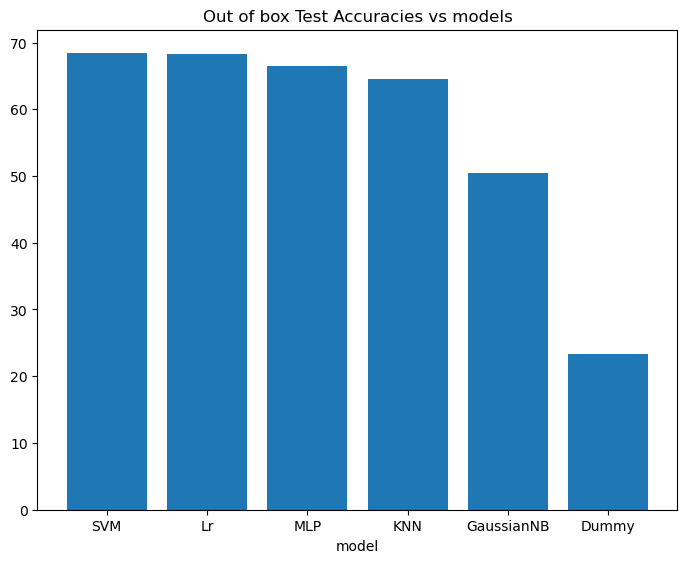

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(out_of_box['Model'], out_of_box['Accuracy (%)'])
plt.title('Out of box Test Accuracies vs models')
plt.xlabel('model')
fig

# 3.0 Improving Classifiers

In this step we will attempt to improve the accuracies of our models. Before we organize the pipelines, we should decides what is used in them.

## 3.1 Preprocessing

In [17]:
#Let us calculate the data variances.

train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[4.28697859e-03 2.78472719e-03 3.69766656e-03 5.13285476e-03
 2.22006906e-03 6.10899364e-03 1.41509522e-03 9.71535528e-03
 2.57967242e-03 1.06336249e-02 6.03821942e-03 6.24823864e-03
 4.68152272e-03 3.30486813e-03 1.63964150e-03 3.06170524e-03
 2.20177113e-03 2.56385241e-03 4.82554810e-03 5.79844398e-03
 3.47360148e-04 2.14654595e-03 6.31019495e-04 2.47384263e-03
 3.92170101e-03 1.13951167e-02 5.47377605e-03 1.94708111e-03
 5.94143315e-03 7.99928809e-03 2.76806428e-03 5.97442607e-03
 6.29606053e-03 3.40624254e-03 1.92485628e-03 6.92235806e-03
 4.45421070e-03 1.46438252e-03 4.14589153e-03 2.42832988e-03
 3.40523212e-03 5.19878809e-04 2.97591739e-03 1.75608327e-03
 1.80698922e-03 1.93433633e-03 3.35223849e-03 5.99676803e-03
 4.01511714e-03 3.51555138e-03 7.08904100e-03 2.35165848e-03
 9.17176027e-04 1.22688223e-03 2.39998165e-03 3.54913266e-03
 8.10219003e-04 7.74782237e-03 3.15465535e-03 1.04738567e-02
 2.13713412e-03 8.51981698e-03 5.44813907e-03 3.84393147e-03
 1.52740634e-04 7.818071

In [18]:
#Corresponding mean values

train_mean = X_train.mean(axis=0)
print(train_mean)
print(np.max(train_mean), np.min(train_mean))

[5.14285467e-03 2.99350217e-03 5.55890536e-03 5.38372052e-03
 6.26392501e-03 6.63129837e-03 4.06608826e-03 1.59410143e-02
 8.50895908e-03 1.23304441e-02 6.58349944e-03 7.12101436e-03
 5.13683589e-03 7.61360900e-03 3.39312373e-03 3.74927481e-03
 4.43410711e-03 8.76689792e-03 7.65765462e-03 6.37191509e-03
 3.56833114e-04 6.80233233e-03 3.81618637e-03 2.54918964e-03
 4.56679924e-03 1.32371085e-02 5.91168291e-03 4.00073069e-03
 6.90613568e-03 8.85263948e-03 3.73077875e-03 8.25622933e-03
 7.46772182e-03 3.79793398e-03 7.23308420e-03 8.62752227e-03
 4.54472246e-03 3.41838961e-03 4.16924793e-03 5.31990075e-03
 4.55011400e-03 1.71785426e-03 3.15070225e-03 3.57982678e-03
 1.91426088e-03 5.53659324e-03 3.80288722e-03 6.59101355e-03
 4.72389827e-03 7.96515171e-03 8.49616187e-03 5.97297381e-03
 1.93610451e-03 3.54286843e-03 3.50131159e-03 4.05626220e-03
 2.71879714e-03 1.83346324e-02 1.04221652e-02 1.11076790e-02
 8.43940061e-03 1.01768271e-02 6.62791173e-03 6.34061572e-03
 2.60431587e-04 8.642076

As we can see we have small mean value and variance, meaning that its not obvious how to find the most important features!!!

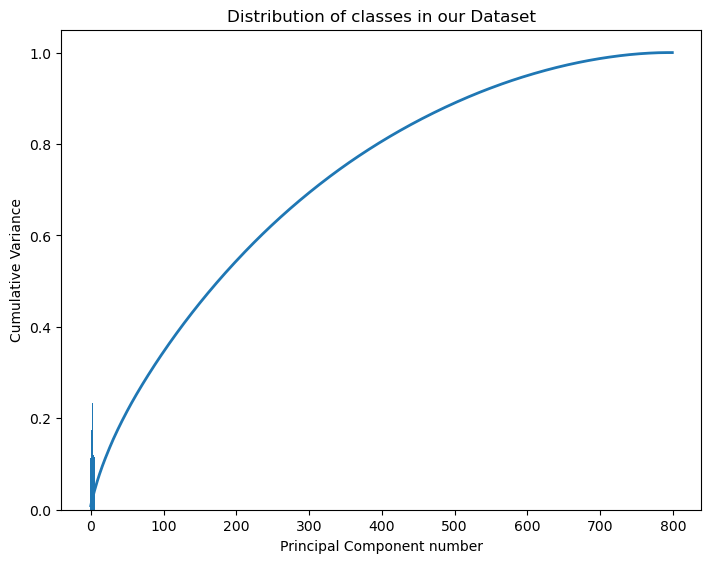

In [19]:
#Let us use PCA...

from sklearn.decomposition import PCA
#N_features
pca = PCA(n_components=N_features)

pca.fit(X_data)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
fig = plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
fig

Unfortunately PCA is of no real use here!

Surely we could use techniques of balancing our data. We will use imblearn.

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_data,y_data)

Let us now check class distribution...

In [21]:
freqs = [X_ros[y_ros==cl].shape[0] for cl in range(7)]

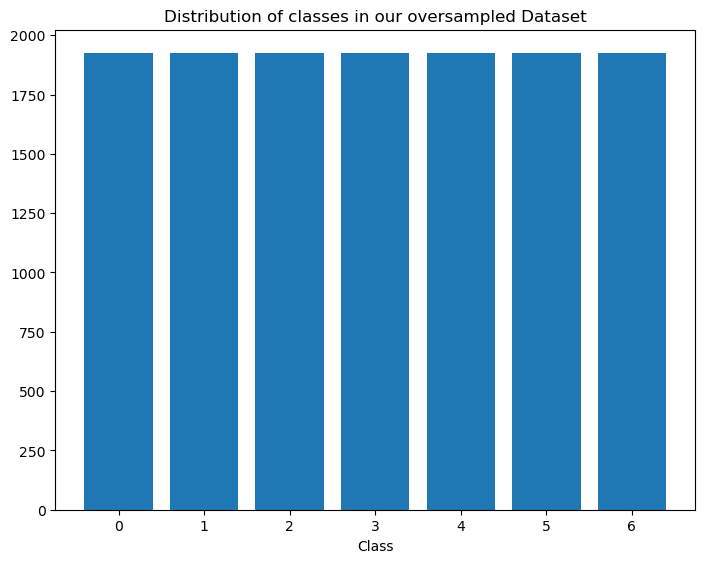

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(7),freqs)
plt.title('Distribution of classes in our oversampled Dataset')
plt.xlabel('Class')
fig

All classes have the same distribution, with a possible risk of overfitting...

We could also use undersampling...

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_data,y_data)

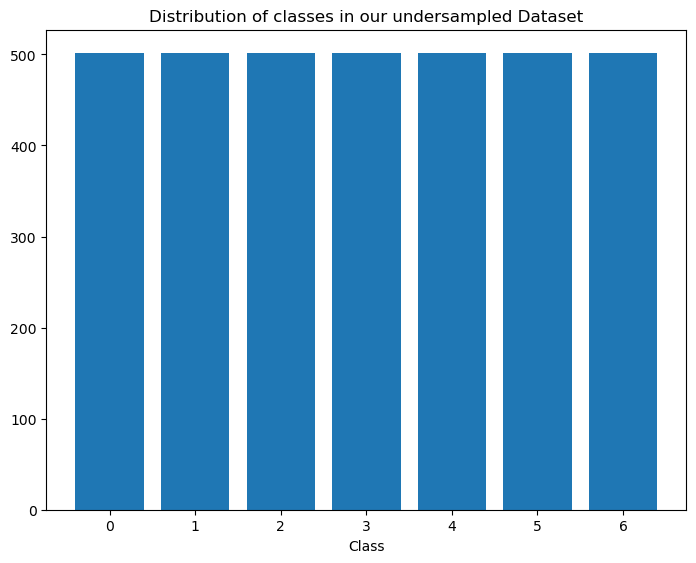

In [24]:
freqs = freqs = [X_rus[y_rus==cl].shape[0] for cl in range(7)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(7),freqs)
plt.title('Distribution of classes in our undersampled Dataset')
plt.xlabel('Class')
fig

This though will probably lead to underfitting...

We could also oversample by creating artificial data!

In [25]:
from imblearn.over_sampling import SMOTE

smo = SMOTE()

X_smo, y_smo = smo.fit_resample(X_data,y_data)

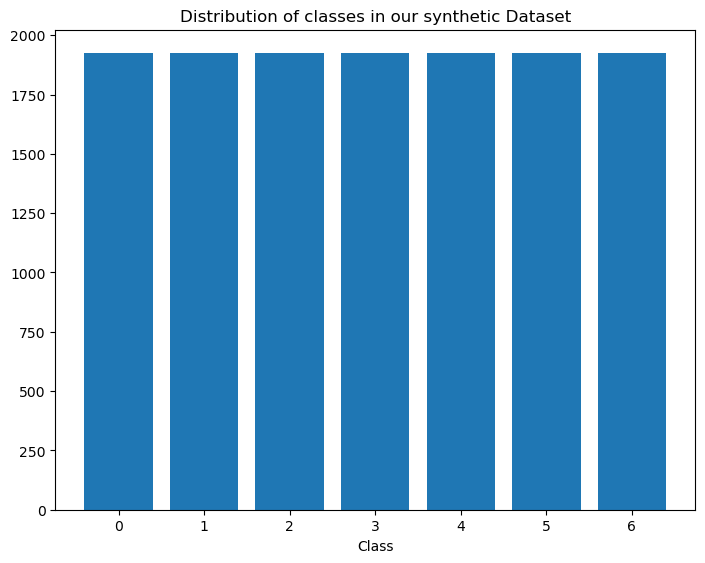

In [26]:
freqs = freqs = [X_smo[y_smo==cl].shape[0] for cl in range(7)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(7),freqs)
plt.title('Distribution of classes in our synthetic Dataset')
plt.xlabel('Class')
fig

## 3.2 Fixing parameters

Here, we will find parameters to improve our models...

In [27]:
#we will use Pipeline from imblearn to use pipe oversampling...
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def find_best(model_collection, grids, X, y):
    start_time = time.time()
    best_params = []
    for model_tuple, grid_points in zip(model_collection, grids):
        name, model = model_tuple
        print('Finding parameters for model:', name)
        model_time = time.time()
        pipe = Pipeline(steps=[('scaler', StandardScaler()),
                  ('sampler', SMOTE(k_neighbors = 20)), (name, model)], memory='mem')
        estimator = GridSearchCV(pipe, grid_points, cv=10, n_jobs=-1)
        #fitting...
        estimator.fit(X, y)
        print("Time for finding best parameters for the model "+name+": %s seconds" % (time.time() - model_time))
        best_params.append(estimator.best_params_)
    print("Total time: %s seconds" % (time.time() - start_time))
    return best_params

In [28]:
collection = [('GaussianNB', GaussianNB()), ('KNN', KNeighborsClassifier()), 
              ('Dummy', DummyClassifier()) ,('SVM', SVC()), ('Lr', LogisticRegression()), ('MLP', MLPClassifier())]

grids = [{'GaussianNB__var_smoothing':[1e-09, 1e-08]}, 
         {'KNN__n_neighbors': [1, 2, 5, 10, 20, 50]},
         {'Dummy__strategy': ['prior']}, 
         {'SVM__kernel': ['linear', 'rbf']},
         {'Lr__penalty':['none', 'l2']}, 
         {'MLP__hidden_layer_sizes': [(50),(80), (20, 10)], 'MLP__alpha': [1.5],
          'MLP__activation': ['relu'], 'MLP__max_iter': [200], 'MLP__solver':['adam']}]

In [29]:
warnings.filterwarnings("ignore")

best_params = find_best(collection, grids, X_train, y_train)

Finding parameters for model: GaussianNB
Time for finding best parameters for the model GaussianNB: 4.495667219161987 seconds
Finding parameters for model: KNN
Time for finding best parameters for the model KNN: 5.310473918914795 seconds
Finding parameters for model: Dummy
Time for finding best parameters for the model Dummy: 0.7225751876831055 seconds
Finding parameters for model: SVM
Time for finding best parameters for the model SVM: 238.50713801383972 seconds
Finding parameters for model: Lr
Time for finding best parameters for the model Lr: 12.303976058959961 seconds
Finding parameters for model: MLP
Time for finding best parameters for the model MLP: 79.67554497718811 seconds
Total time: 341.01610112190247 seconds


In [30]:
best_params

[{'GaussianNB__var_smoothing': 1e-08},
 {'KNN__n_neighbors': 1},
 {'Dummy__strategy': 'prior'},
 {'SVM__kernel': 'rbf'},
 {'Lr__penalty': 'none'},
 {'MLP__activation': 'relu',
  'MLP__alpha': 1.5,
  'MLP__hidden_layer_sizes': 80,
  'MLP__max_iter': 200,
  'MLP__solver': 'adam'}]

In [31]:
collection = [('GaussianNB', GaussianNB), ('KNN', KNeighborsClassifier), 
              ('Dummy', DummyClassifier) ,('SVM', SVC), ('Lr', LogisticRegression), ('MLP', MLPClassifier)]

def evaluation(collection, best_params, X_train, y_train, X_test, y_test):
    accs = []
    f1s = []
    fitted_models = []
    times = []
    for model_tuple, params in zip(collection, best_params):
        
        name, model = model_tuple
        model = Pipeline(steps=[('ss', StandardScaler()), 
                   ('sampler', SMOTE(k_neighbors=20)), (name, model())],
                         memory='mem').set_params(**params)
        start = time.time()
        model.fit(X_train, y_train)
        times.append(time.time() - start)
        accs.append(round(model.score(X_test, y_test),5)*100)
        print('Train accuracy:',name, round(model.score(X_train, y_train),5)*100)
        f1s.append(round(f1_score(y_test, model.predict(X_test), average='macro'),5)*100)
        fitted_models.append((name, model))
    improved = pd.DataFrame({'Model': names, 'Accuracy (%)':accs,
                'F1 Score (%)':f1s, 'time (sec)': times,'Optimized': 6*[True]})
    return improved, fitted_models

In [32]:
improved, fitted_models = evaluation(collection, best_params, X_train, y_train, X_test, y_test)

Train accuracy: GaussianNB 63.452
Train accuracy: KNN 100.0
Train accuracy: Dummy 11.327
Train accuracy: SVM 92.888
Train accuracy: Lr 98.3
Train accuracy: MLP 99.289


In [33]:
fitted_models

[('GaussianNB',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('GaussianNB', GaussianNB(var_smoothing=1e-08))])),
 ('KNN',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('KNN', KNeighborsClassifier(n_neighbors=1))])),
 ('Dummy',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('Dummy', DummyClassifier())])),
 ('SVM',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('SVM', SVC())])),
 ('Lr',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('Lr', LogisticRegression(penalty='none'))])),
 ('MLP',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  

In [34]:
improved.sort_values(by = 'Accuracy (%)', inplace = True, ascending = False)
improved

,Model,Accuracy (%),F1 Score (%),time (sec),Optimized
5,MLP,68.002,66.660,12.051567,True
3,SVM,66.505,64.979,38.146633,True
4,Lr,63.107,61.752,1.328080,True
1,KNN,57.443,57.427,0.156589,True
0,GaussianNB,51.537,51.336,0.245882,True
2,Dummy,11.327,2.907,0.157096,True


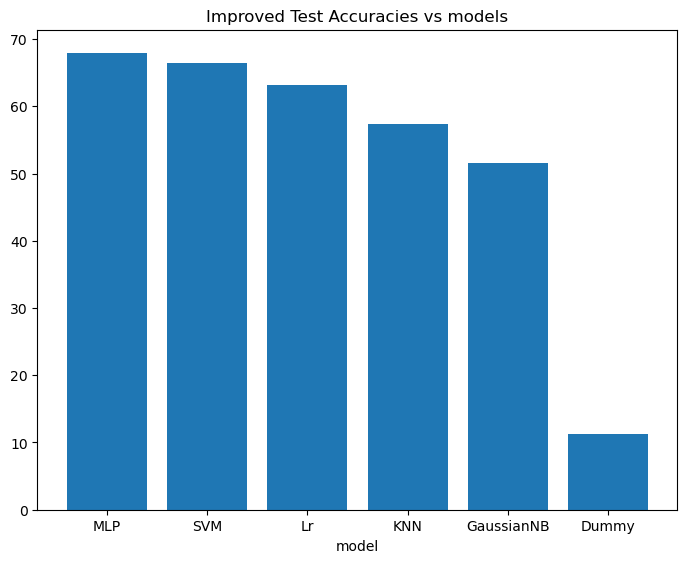

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(improved['Model'], improved['Accuracy (%)'])
plt.title('Improved Test Accuracies vs models')
plt.xlabel('model')
fig

## Results and conclusions

In [36]:
out_of_box = out_of_box.rename(columns={'Accuracy (%)': 'ob Accuracy (%)'
                                        , 'F1 Score (%)': 'ob F1 Score (%)', 'time (sec)': 'ob time (sec)'})
del out_of_box['Optimized']
del improved['Optimized']

In [37]:
merged = pd.merge(out_of_box, improved)
merged

,Model,ob Accuracy (%),ob F1 Score (%),ob time (sec),Accuracy (%),F1 Score (%),time (sec)
0,SVM,68.49,65.70,20.792507,66.505,64.979,38.146633
1,Lr,68.33,66.51,0.839465,63.107,61.752,1.328080
2,MLP,66.50,65.15,14.275590,68.002,66.660,12.051567
3,KNN,64.60,63.43,0.001279,57.443,57.427,0.156589
4,GaussianNB,50.40,50.00,0.061050,51.537,51.336,0.245882
5,Dummy,23.38,5.41,0.000372,11.327,2.907,0.157096


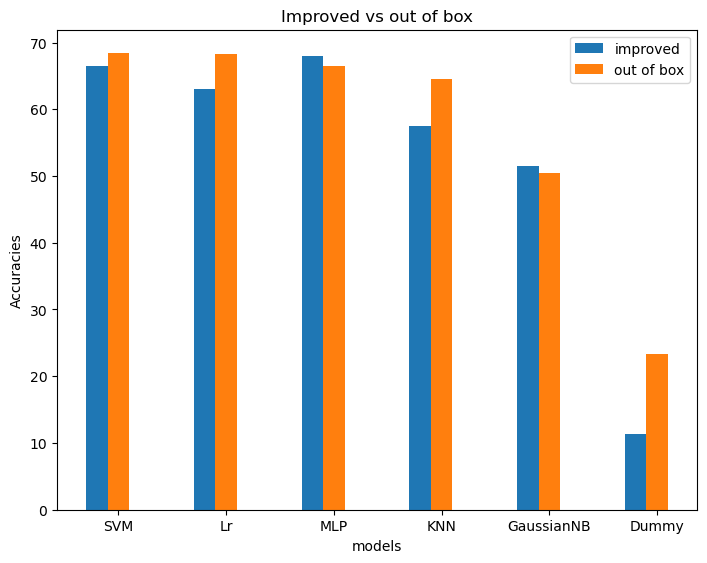

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(6), merged['Accuracy (%)'], label = 'improved', width = 0.2)
ax.bar(np.arange(6)+0.2, merged['ob Accuracy (%)'], label = 'out of box', width = 0.2)
plt.title('Improved vs out of box')
plt.xticks([r + 0.2 for r in range(6)],
        merged['Model'])
plt.xlabel('models')
plt.ylabel('Accuracies')
plt.legend()

fig

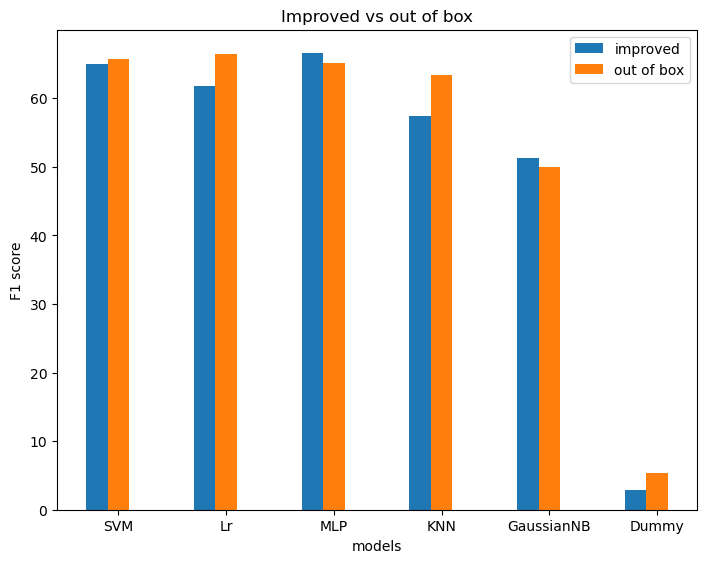

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(6), merged['F1 Score (%)'], label = 'improved', width = 0.2)
ax.bar(np.arange(6)+0.2, merged['ob F1 Score (%)'], label = 'out of box', width = 0.2)
plt.title('Improved vs out of box')
plt.xticks([r + 0.2 for r in range(6)],
        merged['Model'])
plt.xlabel('models')
plt.ylabel('F1 score')
plt.legend()

fig

As we can see , with the exception of MLP, all other models lost in accuracy. This is deceiving, since we dont really compare accuracies of the same data, since we used oversampling methods. Unfortunately, all models suffer from overfitting!!! 

In [40]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion matrix',cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [41]:
fitted_models

[('GaussianNB',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('GaussianNB', GaussianNB(var_smoothing=1e-08))])),
 ('KNN',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('KNN', KNeighborsClassifier(n_neighbors=1))])),
 ('Dummy',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('Dummy', DummyClassifier())])),
 ('SVM',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('SVM', SVC())])),
 ('Lr',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  ('Lr', LogisticRegression(penalty='none'))])),
 ('MLP',
  Pipeline(memory='mem',
           steps=[('ss', StandardScaler()), ('sampler', SMOTE(k_neighbors=20)),
                  

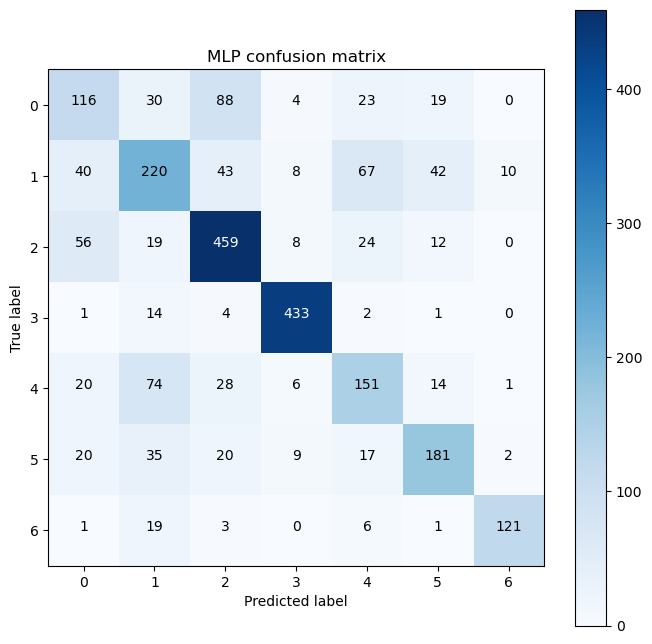

In [42]:
import itertools
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(y_test, fitted_models[5][1].predict(X_test), 'MLP confusion matrix')

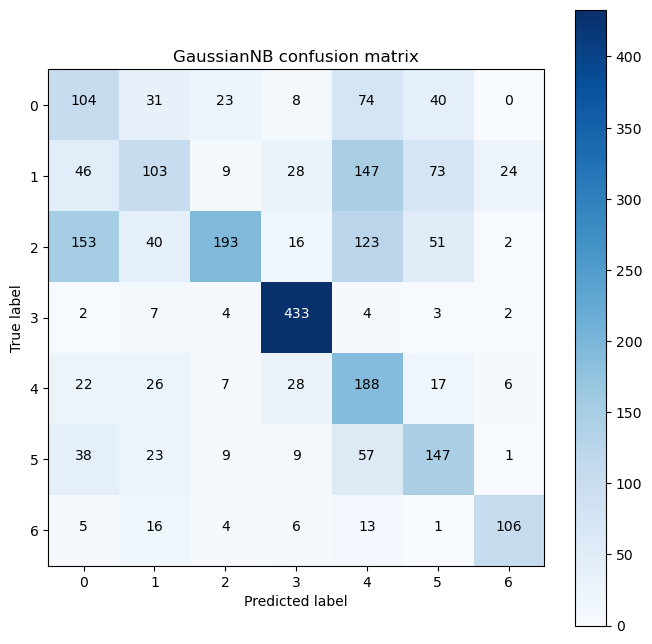

In [43]:
plot_confusion_matrix(y_test, fitted_models[0][1].predict(X_test), 'GaussianNB confusion matrix')

For this dataset, i would choose MLP, since it is the only one which improved, when I used oversampling techniques. This would give it better hope of generalizing. 